### Scatterplots für hochdimensionale Daten

Häufig hat man sehr viele Dimensionen, sodass die Analyse von paarweisen Scatterplots schwierig wird. In diesem Fall kann man Methoden zur Dimensionsreduktion anwenden. Die Idee hierbei ist es, die Korrelationen zwischen den Merkmalen auszunutzen und neue Merkmale zu berechnen, die unkorreliert sind. Bei den neuen Merkmalen beinhalten dann möglichst wenige Merkmale möglichst viel der Informationen aus den ursprünglichen Daten. Ein beliebtes Verfahren hierfür ist die *Hauptkomponentenanalyse* (engl. *principal component analysis* / PCA). Bei der PCA wird der Raum von reellwertigen Merkmalen so transformiert, dass das erste Merkmal möglichst viel der Varianz der Daten erklärt, das zweite Merkmal den zweit größten Anteil und so fort. Die neuen Merkmale nennt man auch die *Hauptkompnenten* (engl. *principal components*) der Daten. Da die Varianz eines Merkmals direkt mit der vorhandenen Information verwandt ist, beinhaltet also die erste Hauptkomponente die meiste Information, die zweite Hauptkomponente die zweitmeiste Information und so fort. Das liegt ganz einfach daran, dass konstante Merkmale keine Informationen beinhalten. Für die Irisdaten können wir mit der PCA die vier Merkmale auf die ersten zwei Hauptkomponenten reduzieren und mit der Farbe die Art der Iris darstellen.

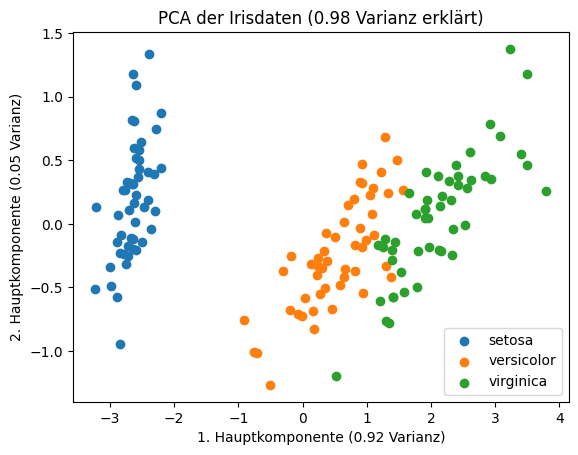

In [2]:
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn import datasets

iris = datasets.load_iris()

pca = decomposition.PCA()
pca.fit(iris.data)
iris_pca = pca.transform(iris.data)

fig, ax = plt.subplots()
for i, label in enumerate(iris.target_names):
    # we need to plot each type of iris on its own to get colors with a legend
    ax.scatter(iris_pca[iris.target==i,0], iris_pca[iris.target==i,1], label=label)
ax.set_xlabel('1. Hauptkomponente (%.2f Varianz)' % pca.explained_variance_ratio_[0])
ax.set_ylabel('2. Hauptkomponente (%.2f Varianz)' % pca.explained_variance_ratio_[1])
ax.set_title('PCA der Irisdaten (%.2f Varianz erklärt)' % sum(pca.explained_variance_ratio_[:2]))
plt.legend()
plt.show()

Die zwei Hauptkomponenten erklären bereits 98% der Varianz der Daten, also beinahe alle Informationen. Man sieht auch, dass sich die Arten der Iris sehr gut unterscheiden lassen und separate Gruppen in den Daten darstellen, auch wenn die Versicolor und die Virginica sehr nah beieinander liegen. Wenn die PCA weniger Varianz der Daten erklärt, kann es sein, dass eine Trennung von Gruppen vorhanden ist, auch wenn man sie nicht sieht: Man bräuchte dann nur die restliche Information, um dies zu erkennen.

Die PCA ist ein mächtiges Werkzeug, um die Dimensionen von Daten zu reduzieren, ohne den Informationsgehalt zu verringern, und insbesondere auch um hochdimensionale Daten darzustellen. Dennoch gibt es zwei wesentliche Nachteile, die auch ähnliche Verfahren betreffen. Das erste Problem ist, dass nicht klar ist, *wofür* die Hauptkomponenten stehen. Beim paarweisen Scatterplot war klar, welche Beziehungen gezeigt werden und somit auch welche Information. Die Hauptkomponenten sind Linearkombinationen der Merkmale, wie diese kombiniert werden, ist jedoch nicht offensichtlich. Hier könnte man höchstens noch die Transformation der PCA genauer betrachten, um an diese Information zu kommen. Das ist aber sehr komplex. Daher eignet sich die PCA in der Regel nur dafür, zu analysieren, ob Daten entsprechend bestimmter Eigenschaften so aussehen wie erwartet oder erhofft (zum Beispiel ob die Arten von Iris gruppiert sind), es ist jedoch nicht ohne Weiteres möglich, die Verteilung der Datenpunkte zu verstehen. Der zweite Nachteil ist, dass die Information möglicherweise nicht mit dem Ziel der Analyse zusammenhängt. Wenn ein Fragebogen zur Kreditwürdigkeit die Lieblingszahl abfragen würde, hätte dies keinen Bezug zum eigentlichen Ziel der Analyse und die Varianz dieser Information wäre entsprechend auch irrelevant. Daher sollte man bei der PCA vorher sicherstellen, dass nur Merkmale benutzt werden, die mit dem Ziel der Analyse zusammenhängen.

> **Bermerkung:**
> 
> Für die PCA interpretiert man die Daten als Matrix $A$, wobei jede Zeile der Matrix eine Instanz ist. Anschließend muss man die folgenden Schritte durchführen: 
> - Zuerst müssen die Spalten der Matrix $A$ so skaliert werden, dass der Erwartungswert null ist ($A_0$). Hierdurch werden Skaleneffekte zwischen den Merkmalen vermieden und die folgenden Berechnungen vereinfacht. 
> - Anschließend wird die Kovarianzmatrix $Cov_A$ von $A_0$ berechnet. Wir berechnen also die Kovarianzen, um die Korrelation zwischen den Merkmalen auszudrücken. 
> - Nun kann man die Eigenwerte und Eigenvektoren von $Cov_A$ berechnen. Die Eigenvektoren müssen anhand ihrer Eigenwerte absteigend sortiert werden, sodass jeder Vektor die Spalte einer Matrix $Eig$ ist. Wenn man die Eigenwerte so reskaliert, dass ihre Summe eins ergibt, erhält man den Anteil der erklärten Varianz der jeweiligen Hauptkomponente. 
> - Durch die Matrixmultiplikation von $Eig$ und $A_0$ erhält man die Hauptkomponenten von $A$.